In [2]:
# using MSDL atlas
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [3]:
import os
import numpy as np

In [4]:
def removeVars (confoundFile):
    import pandas as pd
    confound = pd.read_csv(confoundFile,sep="\t", na_values="n/a")
    finalConf = confound[['csf', 'white_matter', 'global_signal',
                          'a_comp_cor_00', 'a_comp_cor_01',	'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 
                        'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']]
 
    return finalConf

In [5]:
subList =  ['008', '1253' , '1293' ,'1307','1322','1339','1343','1387'] #'1223'
midSubList = ['1253','1263','1351','1364','1369','1390','1403']

subject_list = np.concatenate([subList,midSubList])
rest_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subList]

confound_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subList]


rest_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subList]

confound_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subList]
kpe_label = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

rest_files = np.concatenate([rest_files_1, rest_files_2])
confound_files = np.concatenate([confound_files_1, confound_files_2])

In [6]:
from nilearn.input_data import NiftiMapsMasker
# in this mask we standardize the values, so mean is 0 and between -1 to 1
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory="/home/oad4/scratch60/nilearn",high_pass=.01 , low_pass = .1, t_r=1, verbose=5)

In [ ]:
total_subjects = [] # creating an empty array that will hold all subjects matrix 
# running for kpe first session only
for func_file, confound_file in zip(rest_files_1, confound_files_1):
    confoundClean = removeVars(confound_file)
    confoundArray = confoundClean.values
    time_series = masker.fit_transform(func_file, confounds=confoundArray)
    #time_series = extractor.fit_transform(func_file, confounds=confoundArray)
    #masker.fit_transform(func_file, confoundArray)
    total_subjects.append(time_series)

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:301: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.memory_level == 0 and self.memory.cachedir is not None:
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is curre

________________________________________resample_img cache loaded - 0.5s, 0.0min
[Memory]1.1s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/oad4/scratch60/kpeOutput/fmriprep/sub-1253/ses-1/func/sub-1253_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'maps_img': '/home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': 1,
  'target_affine': None,
  'target_shape': None}, confounds=array([[6466.359068, ...,    0.      ],
       ...,
       [6357.153265, ...,    0.      ]]), dtype=None, memory=Memory(location=/home/oad4/scratch60/nilearn/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from /home/oad4/scratch60/kpeOutput/fmriprep/sub-1253/ses-1/func/sub-1253_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-pre

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[NiftiMapsMasker.transform_single_imgs] Cleaning extracted signals


In [14]:
total_subjects[0].shape


(580, 39)

In [15]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='partial correlation') # can choose partial - it might be better
# create correlation matrix for each subject
fullMatrix = []
for time_series in total_subjects:
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    fullMatrix.append(correlation_matrix)

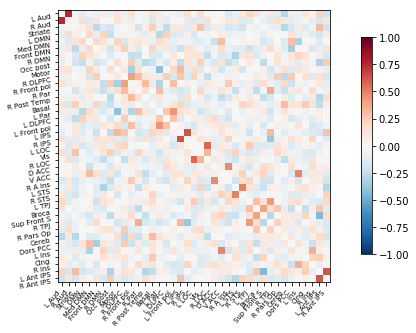

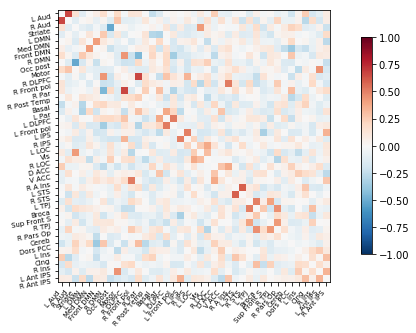

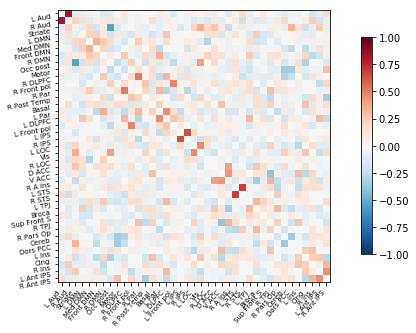

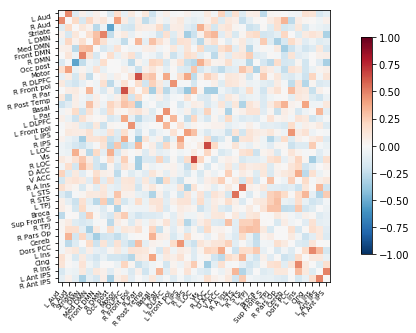

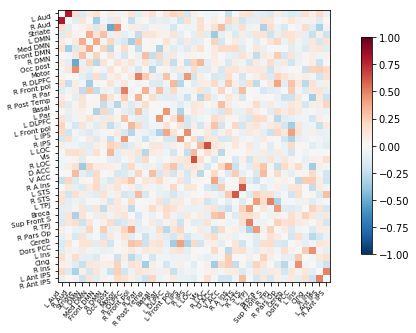

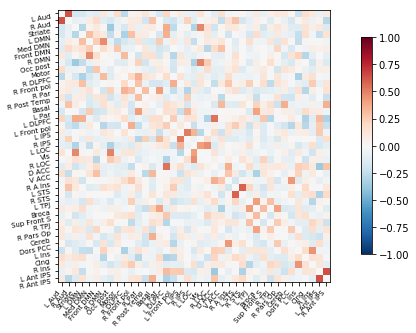

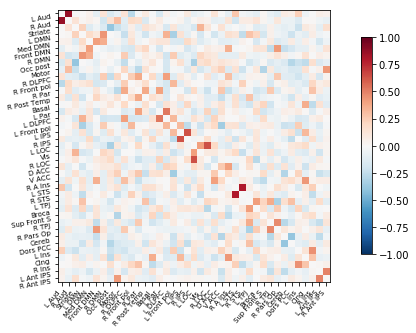

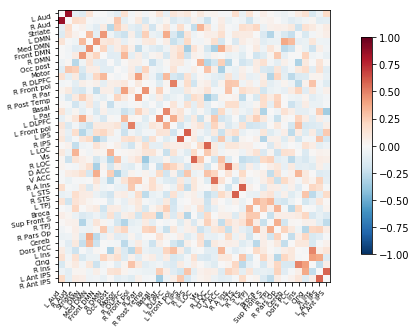

In [16]:
# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
# plotting correlation matrix for each subject
for matrix in fullMatrix:
    np.fill_diagonal(matrix, 0)
    plotting.plot_matrix(matrix, labels=labels, colorbar=True,
                     vmax=1, vmin=-1)

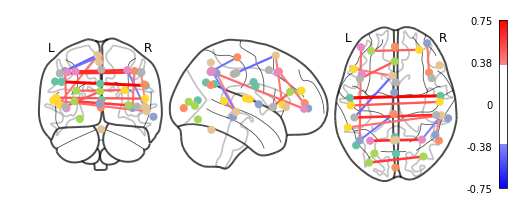

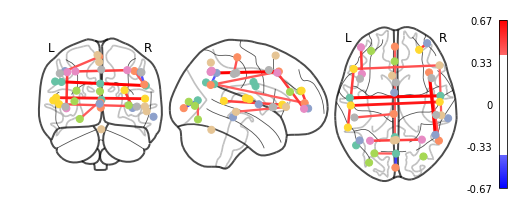

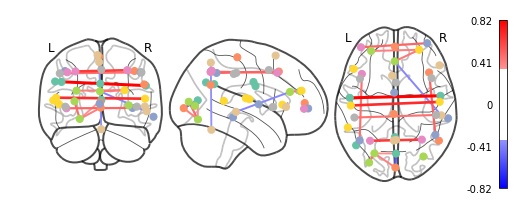

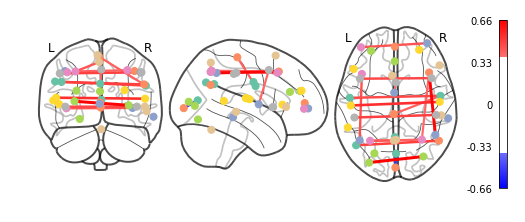

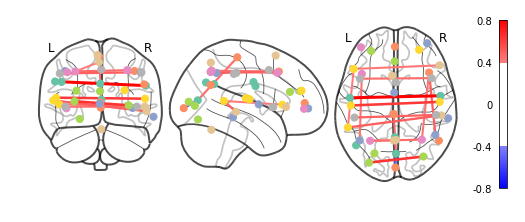

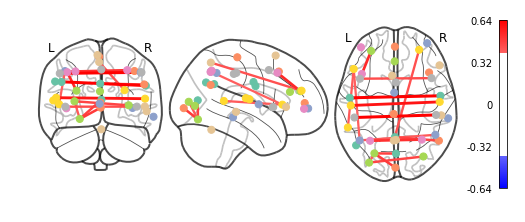

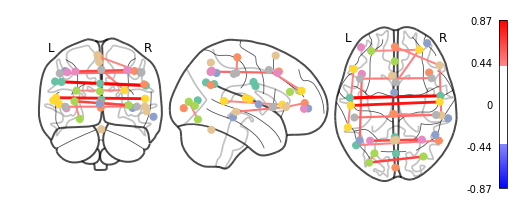

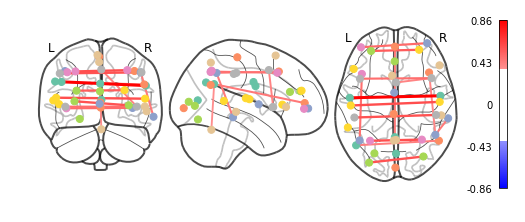

In [17]:
for matrix in fullMatrix:
    plotting.plot_connectome(matrix, coords,
                         edge_threshold="98%", colorbar=True)
    plotting.show()

In [18]:
# now we do the second scan
total_subjects_2 = []
for func_file, confound_file in zip(rest_files_2, confound_files_2):
    confoundClean = removeVars(confound_file)
    confoundArray = confoundClean.values
    time_series = masker.fit_transform(func_file, confounds=confoundArray)
    #time_series = extractor.fit_transform(func_file, confounds=confoundArray)
    #masker.fit_transform(func_file, confoundArray)
    total_subjects_2.append(time_series)

[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2347.5s, 39.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2358.4s, 39.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2369.7s, 39.5min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2381.3s, 39.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2391.5s, 39.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2402.5s, 40.0min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2413.9s, 40.2min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2425.0s, 40.4min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [19]:
fullMatrix_2 = []
for time_series in total_subjects_2:
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    fullMatrix_2.append(correlation_matrix)

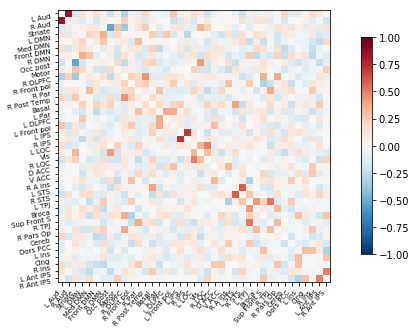

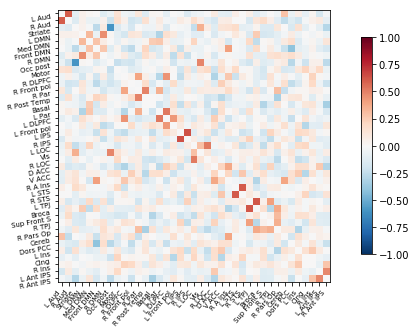

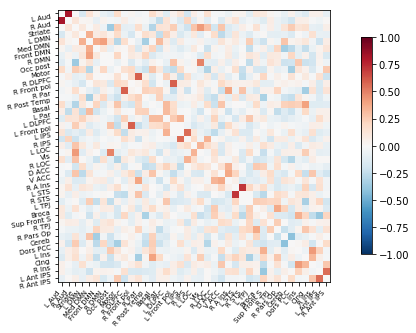

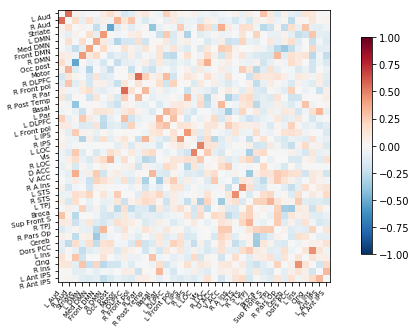

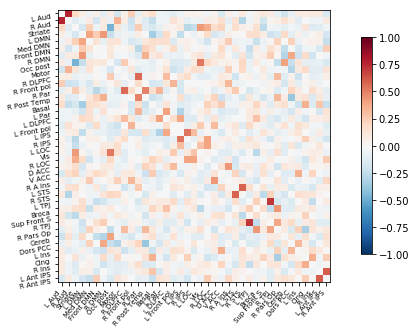

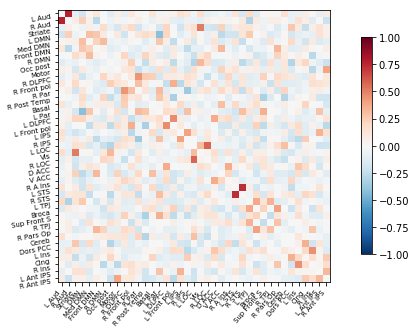

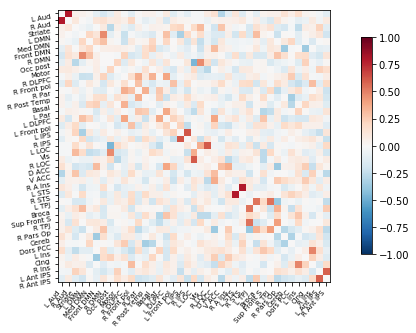

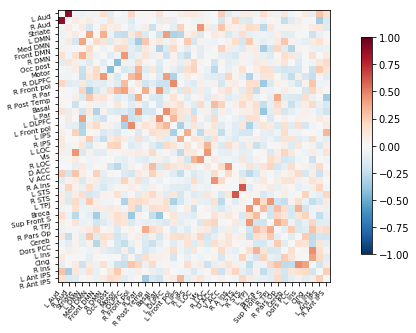

In [20]:
# Display the correlation matrix
# Mask out the major diagonal
# plotting correlation matrix for each subject
for matrix in fullMatrix_2:
    np.fill_diagonal(matrix, 0)
    plotting.plot_matrix(matrix, labels=labels, colorbar=True,
                     vmax=1, vmin=-1)

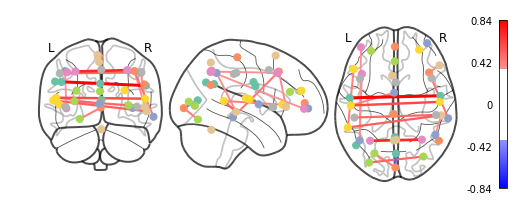

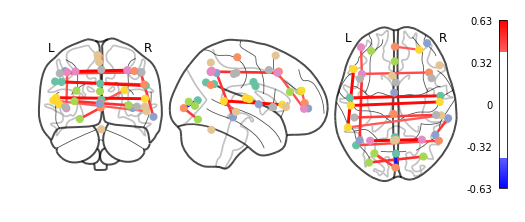

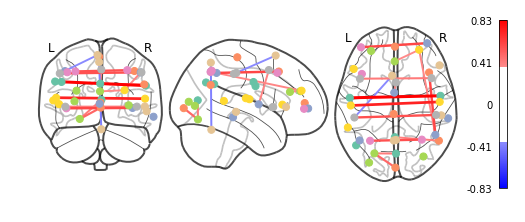

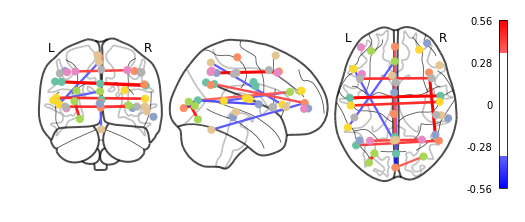

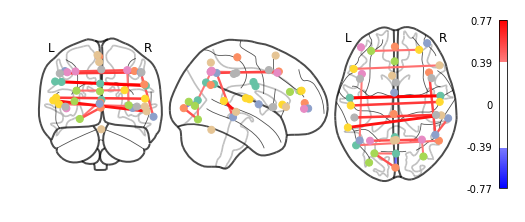

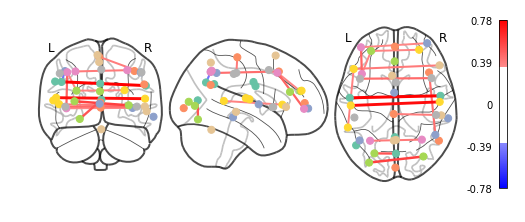

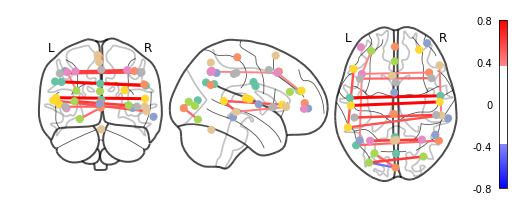

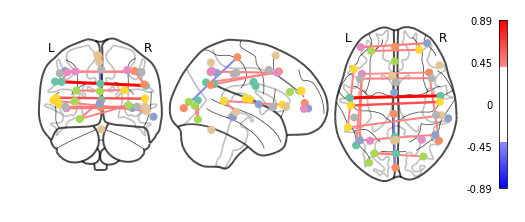

In [21]:
for matrix in fullMatrix_2:
    plotting.plot_connectome(matrix, coords,
                         edge_threshold="98%", colorbar=True)
    plotting.show()

In [ ]:
partial_correlation_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_measure2 = ConnectivityMeasure(kind='partial correlation')
correlation_matrix_allrest1 = partial_correlation_measure.fit_transform(total_subjects)
correlation_matrix_allrest2 = partial_correlation_measure2.fit_transform(total_subjects_2)

In [22]:
# contrasting the second scan from the first for each subject
twoMinusOneMat = []
for scanMatrix, scanMatrix2 in zip(fullMatrix, fullMatrix_2):
    a = scanMatrix2 - scanMatrix
    twoMinusOneMat.append(a)

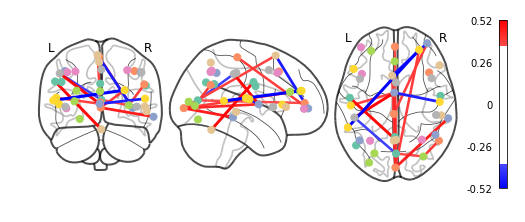

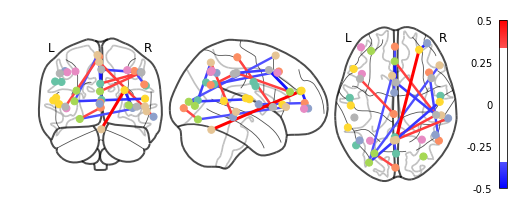

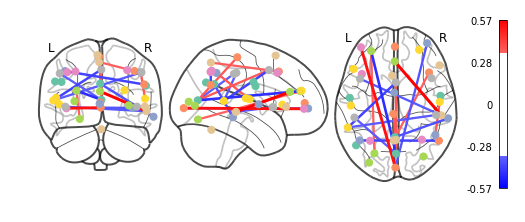

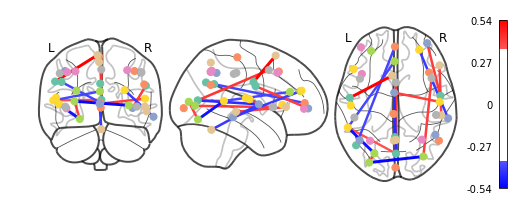

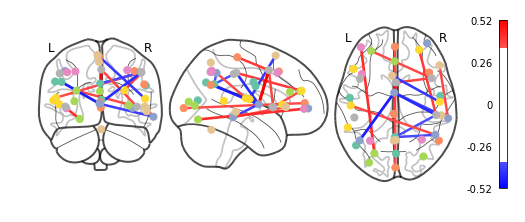

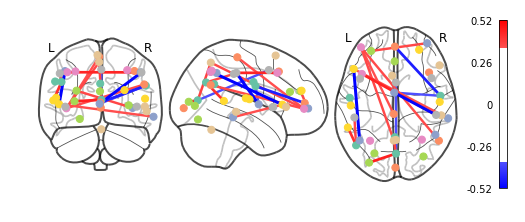

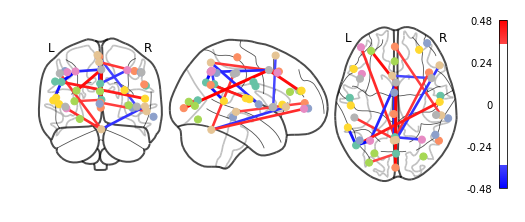

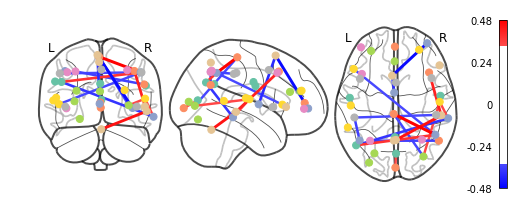

In [23]:
# plotting difference between secnod and first scan for each subject
for matrix in twoMinusOneMat:
    plotting.plot_connectome(matrix, coords,
                         edge_threshold="98%", colorbar=True)
    plotting.show() 

In [24]:
# mean matrices in a different way - first contrast each subject and then group level
metAverage = np.array(twoMinusOneMat) # make the list as array
metAverage.shape

avMat = np.average(metAverage, axis=0) # average across all subjects
print(avMat.shape)

(39, 39)


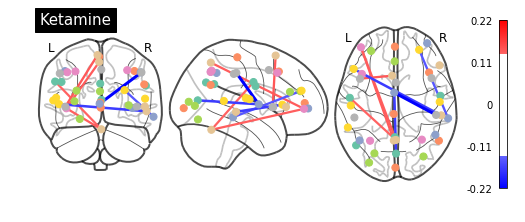

In [25]:
# plot connectome and matrix of average change.
plotting.plot_connectome(avMat, coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine")


Now we do the same procedure to the midazolam group

In [26]:
# now we run the same analysis with midazolam group
mid_rest_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in midSubList]

mid_confound_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in midSubList]


mid_rest_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in midSubList]

mid_confound_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in midSubList]


In [27]:
total_subjects_mid = [] # creating an empty array that will hold all subjects matrix 
# running for kpe first session only
for func_file, confound_file in zip(mid_rest_files_1, mid_confound_files_1):
    confoundClean = removeVars(confound_file)
    confoundArray = confoundClean.values
    time_series = masker.fit_transform(func_file, confounds=confoundArray)
    #time_series = extractor.fit_transform(func_file, confounds=confoundArray)
    #masker.fit_transform(func_file, confoundArray)
    total_subjects_mid.append(time_series)
    


[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2801.5s, 46.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2812.7s, 46.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2824.2s, 47.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2835.1s, 47.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2846.2s, 47.4min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2857.8s, 47.6min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]2868.5s, 47.8min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.1s, 0.0min


In [28]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='partial correlation') # can choose partial - it might be better
# create correlation matrix for each subject
fullMatrix_mid = []
for time_series in total_subjects_mid:
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    fullMatrix_mid.append(correlation_matrix)

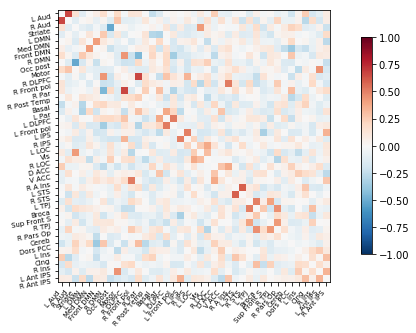

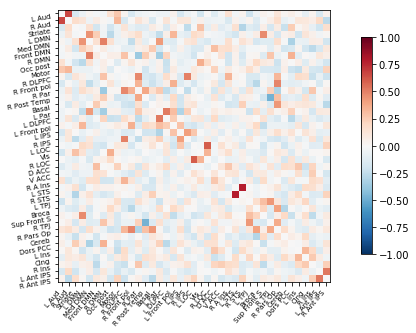

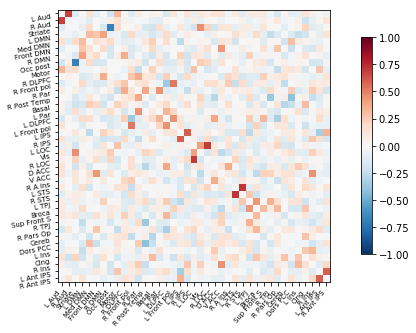

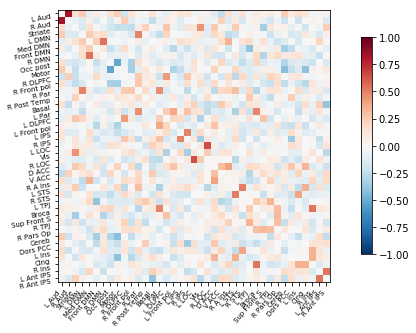

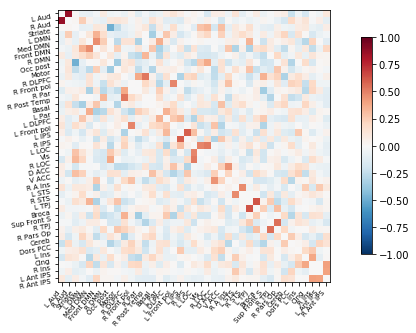

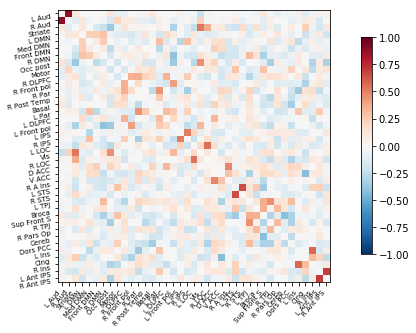

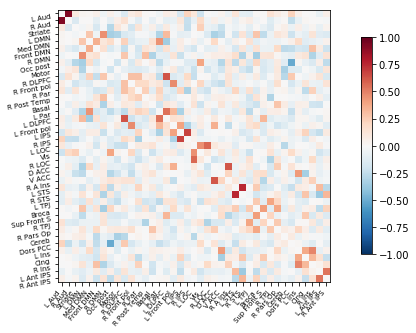

In [29]:
# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
# plotting correlation matrix for each subject

for matrix in fullMatrix_mid:
    np.fill_diagonal(matrix, 0)
    plotting.plot_matrix(matrix, labels=labels, colorbar=True,
                     vmax=1, vmin=-1)

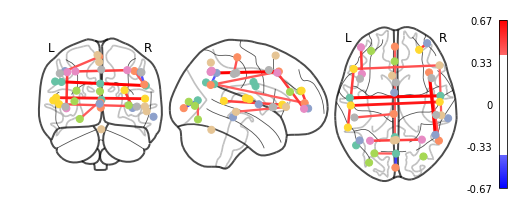

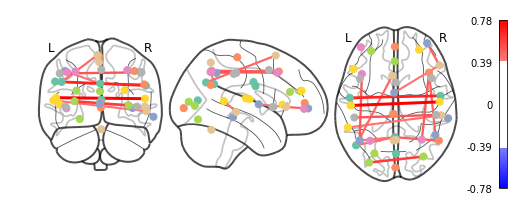

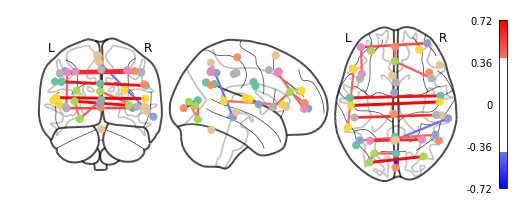

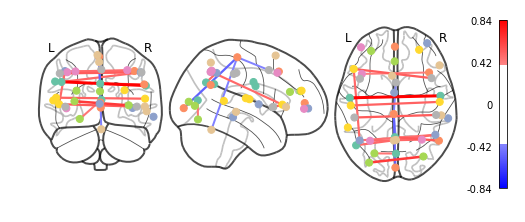

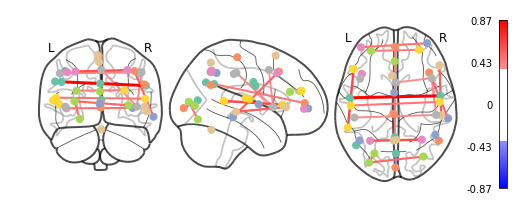

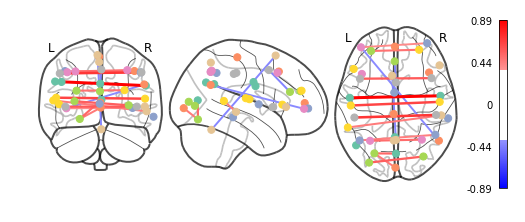

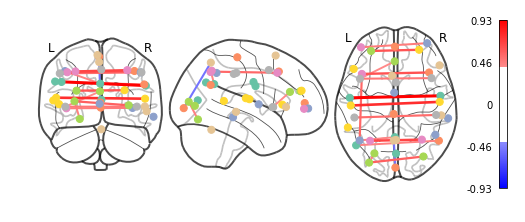

In [30]:
for matrix in fullMatrix_mid:
    plotting.plot_connectome(matrix, coords,
                         edge_threshold="98%", colorbar=True)
    plotting.show()

In [31]:
# now we do the second scan
total_subjects_2_mid = []
for func_file, confound_file in zip(mid_rest_files_2, mid_confound_files_2):
    confoundClean = removeVars(confound_file)
    confoundArray = confoundClean.values
    time_series = masker.fit_transform(func_file, confounds=confoundArray)
    #time_series = extractor.fit_transform(func_file, confounds=confoundArray)
    #masker.fit_transform(func_file, confoundArray)
    total_subjects_2_mid.append(time_series)

[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8827.0s, 147.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8839.3s, 147.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8852.0s, 147.5min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8864.4s, 147.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8876.5s, 147.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8889.7s, 148.2min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8901.5s, 148.4min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [32]:
# create correlation matrix for each subject
fullMatrix_mid_2 = []
for time_series in total_subjects_2_mid:
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    fullMatrix_mid_2.append(correlation_matrix)

In [33]:
# contrasting the second scan from the first for each subject
twoMinusOneMat_mid = []
for scanMatrix, scanMatrix2 in zip(fullMatrix_mid, fullMatrix_mid_2):
    a = scanMatrix2 - scanMatrix
    twoMinusOneMat_mid.append(a)
# mean matrices in a different way - first contrast each subject and then group level
metAverage_mid = np.array(twoMinusOneMat_mid) # make the list as array
metAverage_mid.shape

avMat_mid = np.average(metAverage_mid, axis=0) # average across all subjects
print(avMat_mid.shape)

(39, 39)


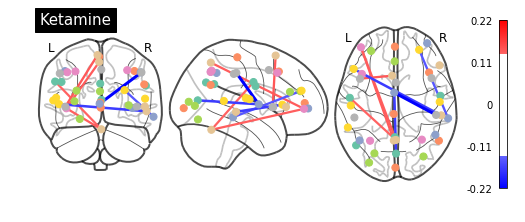

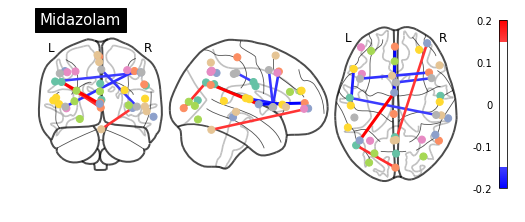

In [34]:
# plot connectome and matrix of average change.
plotting.plot_connectome(avMat, coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine")

# plot connectome and matrix of average change.
plotting.plot_connectome(avMat_mid, coords,
                         edge_threshold="99%", colorbar=True, title = "Midazolam")


We should also contrast second to first scan across groups. To try and see the effect of psychotherapy. 

In [35]:
rest_filesAll_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subject_list]

confound_filesAll_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subject_list]


rest_filesAll_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subject_list]

confound_filesAll_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subject_list]

In [36]:
total_subjects_all = [] # creating an empty array that will hold all subjects matrix 
# running for kpe first session only
for func_file, confound_file in zip(rest_filesAll_1, confound_filesAll_1):
    confoundClean = removeVars(confound_file)
    confoundArray = confoundClean.values
    time_series = masker.fit_transform(func_file, confounds=confoundArray)
    #time_series = extractor.fit_transform(func_file, confounds=confoundArray)
    #masker.fit_transform(func_file, confoundArray)
    total_subjects_all.append(time_series)
    
# create correlation matrix for each subject
fullMatrix_all = []
for time_series in total_subjects_all:
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    fullMatrix_all.append(correlation_matrix)

[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8944.7s, 149.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8956.7s, 149.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8969.1s, 149.5min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8981.9s, 149.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]8993.1s, 149.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9005.1s, 150.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9017.5s, 150.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9030.0s, 150.5min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9041.9s, 150.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9054.2s, 150.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9066.9s, 151.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9079.2s, 151.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9091.5s, 151.5min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9104.2s, 151.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9116.2s, 151.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [37]:
# now we do the second scan
total_subjects_2_all = []
for func_file, confound_file in zip(rest_filesAll_2, confound_filesAll_2):
    confoundClean = removeVars(confound_file)
    confoundArray = confoundClean.values
    time_series = masker.fit_transform(func_file, confounds=confoundArray)
    #time_series = extractor.fit_transform(func_file, confounds=confoundArray)
    #masker.fit_transform(func_file, confoundArray)
    total_subjects_2_all.append(time_series)

# create correlation matrix for each subject
fullMatrix_all_2 = []
for time_series in total_subjects_2_all:
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    fullMatrix_all_2.append(correlation_matrix)

[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9137.5s, 152.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9149.5s, 152.5min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9162.0s, 152.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9174.8s, 152.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9186.3s, 153.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9198.2s, 153.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9211.0s, 153.5min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9223.6s, 153.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9235.6s, 153.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9247.9s, 154.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9260.7s, 154.3min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9273.2s, 154.6min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9285.5s, 154.8min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9298.4s, 155.0min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]9310.4s, 155.2min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [38]:
# contrasting the second scan from the first for each subject
twoMinusOneMat_all = []
for scanMatrix, scanMatrix2 in zip(fullMatrix_all, fullMatrix_all_2):
    a = scanMatrix2 - scanMatrix
    twoMinusOneMat_all.append(a)
# mean matrices in a different way - first contrast each subject and then group level
metAverage_all = np.array(twoMinusOneMat_all) # make the list as array
metAverage_all.shape

avMat_all = np.average(metAverage_all, axis=0) # average across all subjects
print(avMat_all.shape)

(39, 39)


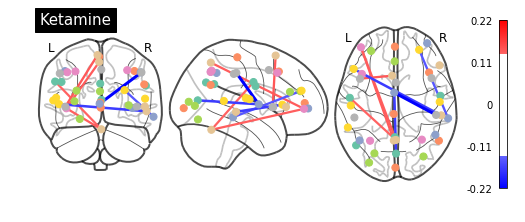

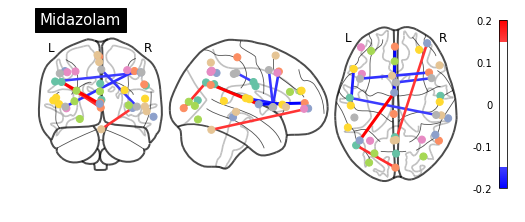

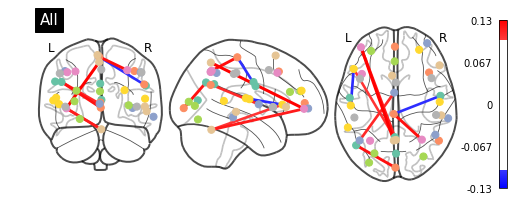

In [39]:
# plot connectome and matrix of average change.
plotting.plot_connectome(avMat, coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine")

# plot connectome and matrix of average change.
plotting.plot_connectome(avMat_mid, coords,
                         edge_threshold="99%", colorbar=True, title = "Midazolam")

# plot connectome and matrix of average change.
plotting.plot_connectome(avMat_all, coords,
                         edge_threshold="99%", colorbar=True, title = "All")

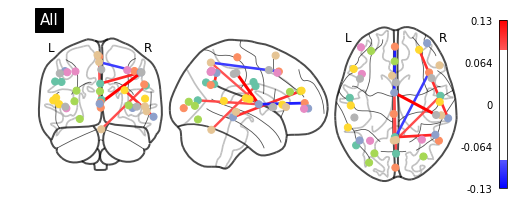

In [44]:
# now we will try something a bit weird
# we will contrast ketamine with all and then midazolam with all and see if we are left with effect of Psychotherapy
allNoKet = avMat_all - avMat
allNoMid = avMat_all - avMat_mid

allNoKetMid = allNoKet - avMat_mid

plotting.plot_connectome(allNoKet, coords,
                         edge_threshold="99%", colorbar=True, title = "All")

In [183]:
# just platying with interactive plot
from nilearn import plotting
coords = atlas.region_coords

view = plotting.view_connectome(avMat, coords, threshold='99%')
view_all = plotting.view_connectome(avMat_all, coords, threshold='99%')
#view
view_all